In [22]:
import requests
import pandas as pd

In [23]:
RANK_URL = "https://api.stock.naver.com/ranking/stock/local/total"
response = requests.get(RANK_URL)
response

<Response [200]>

In [24]:
datas = response.json()['datas']

data_list = []

for data in datas:
    ranking = data['ranking']
    reuters_code=data['reutersCode']
    stock_name=data['stockName']
    close_price= float(data['closePrice'].replace(",", ""))
    compare_previous_close_price = float(data['compareToPreviousClosePrice'].replace(",", ""))
    acc_trading_volume = data['accumulatedTradingVolume']
    market_value= data['marketValueHangeul']
    local_traded_at = data['localTradedAt']
    
    fin_data = {
        "순위" : ranking,
        "코드" : reuters_code,
        "종목명": stock_name,
        "종가": close_price,
        "전일종가대비": compare_previous_close_price,
        "누적거래량": acc_trading_volume,
        "시가총액": market_value,
        "거래시각": local_traded_at
    }
    
    data_list.append(fin_data)

In [25]:
df = pd.DataFrame(data_list)
df.head()

,순위,코드,종목명,종가,전일종가대비,누적거래량,시가총액,거래시각
0,1,005930,삼성전자,75600.0,-200.0,"17,616,621","451조 3,156억원",2021-12-03T16:11:25+09:00
1,2,068270,셀트리온,210500.0,-2500.0,"620,302",29조 379억원,2021-12-03T16:11:38+09:00
2,3,112040,위메이드,179900.0,11200.0,"2,721,685","5조 9,947억원",2021-12-03T16:11:37+09:00
3,4,256840,한국비엔씨,19150.0,100.0,"8,925,993","9,868억원",2021-12-03T16:11:39+09:00
4,5,096530,씨젠,66500.0,200.0,"854,098","3조 4,730억원",2021-12-03T16:10:53+09:00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      10 non-null     int64  
 1   코드      10 non-null     object 
 2   종목명     10 non-null     object 
 3   종가      10 non-null     float64
 4   전일종가대비  10 non-null     float64
 5   누적거래량   10 non-null     object 
 6   시가총액    10 non-null     object 
 7   거래시각    10 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 768.0+ bytes


In [27]:
KOSPI_URL = "https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1"
KOSDAQ_URL = "https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=1"

kospi_data = requests.get(KOSPI_URL).json()
df_kospi = pd.DataFrame(kospi_data)
df_kospi

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2021-12-03,"2,968.33",23.06,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.78,"2,935.93","2,975.44","2,927.55"
1,2021-12-02,"2,945.27",45.55,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.57,"2,874.64","2,945.27","2,874.64"
2,2021-12-01,"2,899.72",60.71,"{'code': '2', 'text': '상승', 'name': 'RISING'}",2.14,"2,860.12","2,905.74","2,837.03"
3,2021-11-30,"2,839.01",-70.31,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.42,"2,932.71","2,942.93","2,822.73"
4,2021-11-29,"2,909.32",-27.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.92,"2,906.15","2,930.22","2,890.78"
5,2021-11-26,"2,936.44",-43.83,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.47,"2,973.04","2,985.77","2,930.31"
6,2021-11-25,"2,980.27",-14.02,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.47,"2,996.74","2,996.74","2,973.24"
7,2021-11-24,"2,994.29",-3.04,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.10,"3,006.34","3,017.90","2,981.02"
8,2021-11-23,"2,997.33",-15.92,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.53,"3,013.16","3,016.36","2,992.14"
9,2021-11-22,"3,013.25",42.23,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.42,"2,983.38","3,018.01","2,980.73"


In [28]:
df_kosdaq = pd.read_json(KOSDAQ_URL)
df_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   localTradedAt                10 non-null     object 
 1   closePrice                   10 non-null     object 
 2   compareToPreviousClosePrice  10 non-null     float64
 3   compareToPreviousPrice       10 non-null     object 
 4   fluctuationsRatio            10 non-null     float64
 5   openPrice                    10 non-null     object 
 6   highPrice                    10 non-null     object 
 7   lowPrice                     10 non-null     object 
dtypes: float64(2), object(6)
memory usage: 768.0+ bytes


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set()

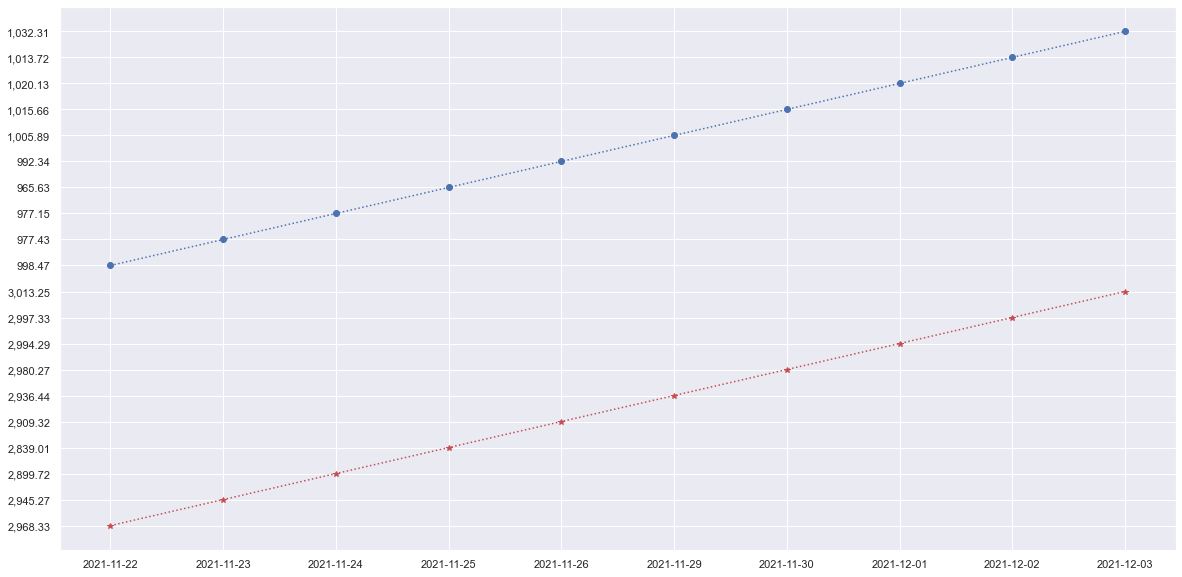

In [31]:
plt.figure(figsize=(20, 10))

plt.plot(df_kospi["localTradedAt"].sort_values(), df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"].sort_values(), df_kosdaq["closePrice"], "bo:", label="kosdaq")

plt.show()

In [32]:
import numpy as np

df_kospi["closePrice"] = df_kospi["closePrice"].str.replace(",", "")
df_kospi["closePrice"] = df_kospi["closePrice"].astype(np.float32)

df_kosdaq["closePrice"] = df_kosdaq["closePrice"].str.replace(",", "")
df_kosdaq["closePrice"] = df_kosdaq["closePrice"].astype(np.float32)

In [34]:
plt.figure(figsize=(20, 10))

plt.plot(df_kospi["localTradedAt"].sort_value(), df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"].sort_value(), df_kosdaq["closePrice"], "bo:", label="kosdaq")
plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'sort_value'

<Figure size 1440x720 with 0 Axes>

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
scaler = MinMaxScaler()
df_close_price = df_kospi["closePrice"]
df_close_price

0    2968.330078
1    2945.270020
2    2899.719971
3    2839.010010
4    2909.320068
5    2936.439941
6    2980.270020
7    2994.290039
8    2997.330078
9    3013.250000
Name: closePrice, dtype: float32

In [37]:
close_price_scaled = scaler.fit_transform(df_close_price.values.reshape(-1, 1))
close_price_scaled

array([[0.7421951 ],
       [0.609848  ],
       [0.34842682],
       [0.        ],
       [0.4035244 ],
       [0.5591717 ],
       [0.81072044],
       [0.89118576],
       [0.9086323 ],
       [1.        ]], dtype=float32)

In [38]:
from sklearn import preprocessing
scaled_kospi_cp = preprocessing.minmax_scale(df_kospi["closePrice"])
scaled_kosdaq_cp = preprocessing.minmax_scale(df_kosdaq["closePrice"])

In [40]:
scaled_kospi_cp, scaled_kosdaq_cp

(array([0.7421951 , 0.609848  , 0.34842682, 0.        , 0.4035244 ,
        0.5591717 , 0.81072044, 0.89118576, 0.9086323 , 1.        ],
       dtype=float32),
 array([0.4925003 , 0.1769638 , 0.17276573, 0.        , 0.40056992,
        0.60377884, 0.7502985 , 0.8173351 , 0.72120476, 1.        ],
       dtype=float32))

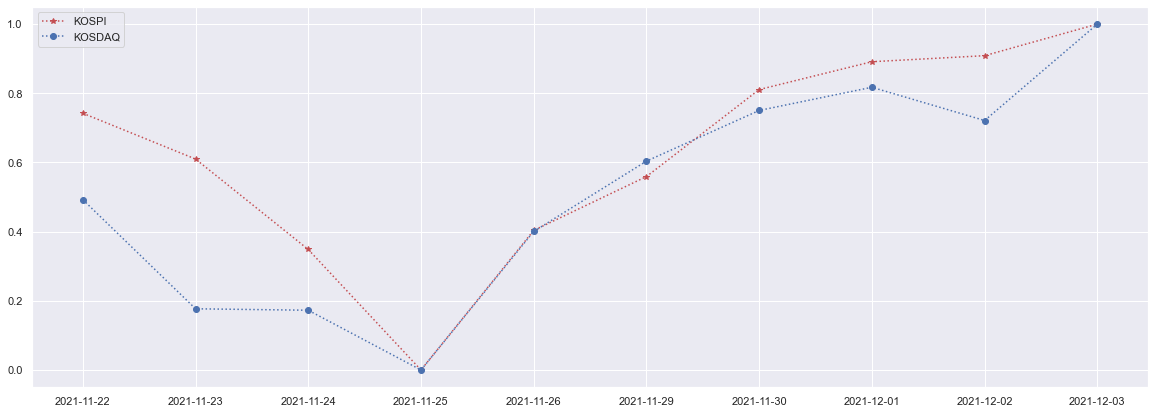

In [43]:
trade_dates = df_kospi["localTradedAt"][::-1]

plt.figure(figsize=(20,7))
plt.plot(trade_dates, scaled_kospi_cp, "r*:", label="KOSPI")
plt.plot(trade_dates, scaled_kosdaq_cp, "bo:", label="KOSDAQ")
plt.legend()
plt.show()

In [44]:
df_kospi

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2021-12-03,2968.330078,23.06,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.78,"2,935.93","2,975.44","2,927.55"
1,2021-12-02,2945.270020,45.55,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.57,"2,874.64","2,945.27","2,874.64"
2,2021-12-01,2899.719971,60.71,"{'code': '2', 'text': '상승', 'name': 'RISING'}",2.14,"2,860.12","2,905.74","2,837.03"
3,2021-11-30,2839.010010,-70.31,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.42,"2,932.71","2,942.93","2,822.73"
4,2021-11-29,2909.320068,-27.12,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.92,"2,906.15","2,930.22","2,890.78"
5,2021-11-26,2936.439941,-43.83,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.47,"2,973.04","2,985.77","2,930.31"
6,2021-11-25,2980.270020,-14.02,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.47,"2,996.74","2,996.74","2,973.24"
7,2021-11-24,2994.290039,-3.04,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.10,"3,006.34","3,017.90","2,981.02"
8,2021-11-23,2997.330078,-15.92,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.53,"3,013.16","3,016.36","2,992.14"
9,2021-11-22,3013.250000,42.23,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.42,"2,983.38","3,018.01","2,980.73"


In [45]:
DOW_URL = "https://api.stock.naver.com/index/.DJI/price?page=1&pageSize=10"
df_dow = pd.read_json(DOW_URL)
df_dow.head()

,stockExchangeType,localTradedAt,worldIndexSymbol,openPrice,highPrice,lowPrice,closePrice,compareToPreviousClosePrice,fluctuationsRatio,compareToPreviousPrice
0,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2021-12-03T17:35:08-05:00,.DJI,"34,692.78","34,801.31","34,264.57","34,580.08",-59.71,-0.17,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
1,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2021-12-02T17:08:50-05:00,.DJI,"34,076.25","34,759.65","34,076.25","34,639.79",617.75,1.82,"{'code': '2', 'text': '상승', 'name': 'RISING'}"
2,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2021-12-01T17:04:01-05:00,.DJI,"34,678.94","35,004.64","34,006.98","34,022.04",-461.68,-1.34,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
3,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2021-11-30T16:57:28-05:00,.DJI,"35,056.99","35,056.99","34,424.44","34,483.72",-652.22,-1.86,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
4,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2021-11-29T16:57:44-05:00,.DJI,"35,017.71","35,287.91","34,895.89","35,135.94",236.60,0.68,"{'code': '2', 'text': '상승', 'name': 'RISING'}"


In [49]:
df_dow["tradeDateTime"] = pd.to_datetime(df_dow["localTradedAt"])
df_dow[["localTradedAt", "tradeDateTime"]]

,localTradedAt,tradeDateTime
0,2021-12-03T17:35:08-05:00,2021-12-03 17:35:08-05:00
1,2021-12-02T17:08:50-05:00,2021-12-02 17:08:50-05:00
2,2021-12-01T17:04:01-05:00,2021-12-01 17:04:01-05:00
3,2021-11-30T16:57:28-05:00,2021-11-30 16:57:28-05:00
4,2021-11-29T16:57:44-05:00,2021-11-29 16:57:44-05:00
5,2021-11-26T14:12:54-05:00,2021-11-26 14:12:54-05:00
6,2021-11-24T17:05:40-05:00,2021-11-24 17:05:40-05:00
7,2021-11-23T16:57:58-05:00,2021-11-23 16:57:58-05:00
8,2021-11-22T17:01:35-05:00,2021-11-22 17:01:35-05:00
9,2021-11-19T17:08:30-05:00,2021-11-19 17:08:30-05:00


In [50]:
df_dow["tradeDate"] = df_dow["tradeDateTime"].dt.date
df_dow["tradeDate"]

0    2021-12-03
1    2021-12-02
2    2021-12-01
3    2021-11-30
4    2021-11-29
5    2021-11-26
6    2021-11-24
7    2021-11-23
8    2021-11-22
9    2021-11-19
Name: tradeDate, dtype: object